In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import warnings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy



## Loading the Data Set


In [2]:
# Load data set
x = np.load('../input/sign-language-digits-dataset/X.npy')
y = np.load('../input/sign-language-digits-dataset/Y.npy')

In [3]:
print("x shape",x.shape)
print("y shape",y.shape)

x shape (2062, 64, 64)
y shape (2062, 10)


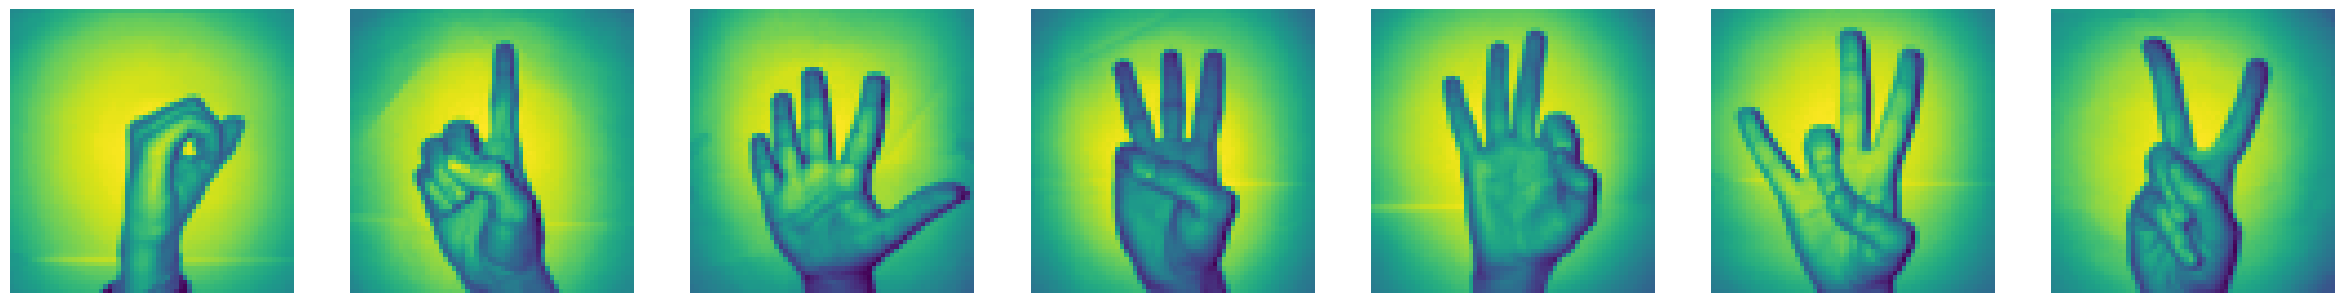

In [4]:
plt.figure(figsize=(30,7))
img_size = 64
plt.subplot(1, 7, 1)
plt.imshow(x[371].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 7, 2)
plt.imshow(x[900].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 7, 3)
plt.imshow(x[2002].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 7, 4)
plt.imshow(x[700].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 7, 5)
plt.imshow(x[51].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 7, 6)
plt.imshow(x[519].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 7, 7)
plt.imshow(x[1732].reshape(img_size, img_size))
plt.axis('off')
plt.show()

In [5]:
x

array([[[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 ,
         0.5137255 , 0.5019608 ],
        [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 ,
         0.5176471 , 0.50980395],
        [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 ,
         0.5254902 , 0.5137255 ],
        ...,
        [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 ,
         0.54509807, 0.53333336],
        [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807,
         0.53333336, 0.52156866],
        [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 ,
         0.52156866, 0.50980395]],

       [[0.59607846, 0.60784316, 0.61960787, ..., 0.4627451 ,
         0.4509804 , 0.44313726],
        [0.60784316, 0.61960787, 0.6313726 , ..., 0.4745098 ,
         0.4627451 , 0.4509804 ],
        [0.6156863 , 0.627451  , 0.6431373 , ..., 0.4862745 ,
         0.4745098 , 0.4627451 ],
        ...,
        [0.50980395, 0.5176471 , 0.5254902 , ..., 0.40392157,
         0.39607844, 0.3882353 ],
        [0.5

In [6]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [7]:
# Reshape data
x = x.reshape(-1,64,64,1)
print("x shape: ",x.shape)

x shape:  (2062, 64, 64, 1)


In [8]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size = 0.1, random_state=42)
print("x_train shape",X_train.shape)
print("X_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("Y_val shape",Y_val.shape)

x_train shape (1855, 64, 64, 1)
X_val shape (207, 64, 64, 1)
y_train shape (1855, 10)
Y_val shape (207, 10)


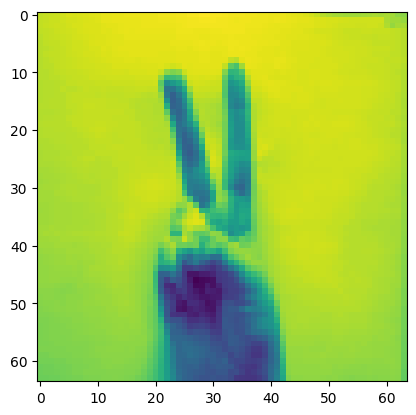

In [9]:
# Some examples
plt.imshow(X_train[2][:,:,0])
plt.show()

<a id="6"></a>
### Create Convolutional Neural Network Model

In [10]:
# 
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 8)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 8)        32        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0

<a id="7"></a>
### Epochs and Batch Size

In [11]:
epochs = 200  # for better result increase the epochs
batch_size = 10

<a id="8"></a>
### Define the optimizer

In [12]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

<a id="9"></a>
### Compile the model

In [13]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

<a id="10"></a>
### Data Augmentation

In [14]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=10,  # randomly rotate images
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

<a id="11"></a>
### Model Training

In [15]:

history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0]//batch_size) # "X_train.shape[0] // batch_size" floor division = tam değer fonksiyonu

Epoch 1/200


2023-09-19 03:23:10.457655: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


185/185 [==============================] - 10s 14ms/step - loss: 3.0432 - accuracy: 0.0932 - val_loss: 2.6767 - val_accuracy: 0.1063
Epoch 2/200
185/185 [==============================] - 2s 12ms/step - loss: 2.7376 - accuracy: 0.1106 - val_loss: 2.6975 - val_accuracy: 0.0531
Epoch 3/200
185/185 [==============================] - 3s 15ms/step - loss: 2.6381 - accuracy: 0.1035 - val_loss: 2.2960 - val_accuracy: 0.1401
Epoch 4/200
185/185 [==============================] - 2s 12ms/step - loss: 2.5483 - accuracy: 0.1198 - val_loss: 2.3225 - val_accuracy: 0.1304
Epoch 5/200
185/185 [==============================] - 2s 12ms/step - loss: 2.4745 - accuracy: 0.1144 - val_loss: 2.3636 - val_accuracy: 0.1256
Epoch 6/200
185/185 [==============================] - 2s 11ms/step - loss: 2.4345 - accuracy: 0.1268 - val_loss: 2.5567 - val_accuracy: 0.1304
Epoch 7/200
185/185 [==============================] - 2s 11ms/step - loss: 2.4123 - accuracy: 0.1377 - val_loss: 2.5228 - val_accuracy: 0.1063
Epo

<a id="12"></a>
### Visualizing The Results

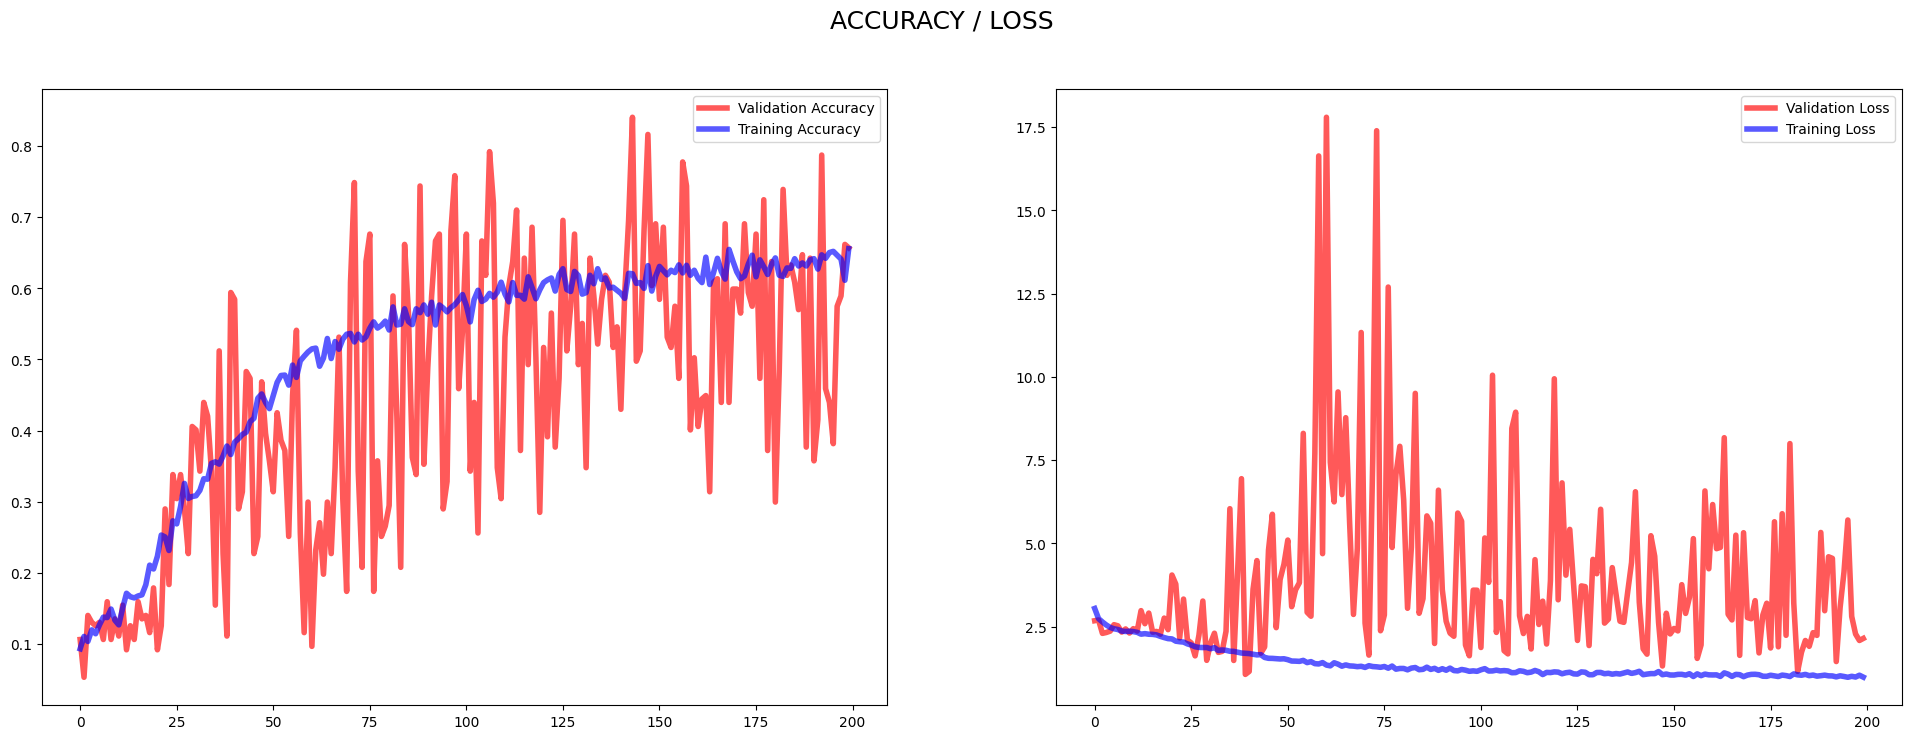

In [16]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", c="red", linewidth=4,alpha = 0.65)
plt.plot(history.history["accuracy"], label="Training Accuracy", c="blue", linewidth=4,alpha = 0.65)
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history["val_loss"], label="Validation Loss", c="red", linewidth=4,alpha = 0.65)
plt.plot(history.history["loss"], label="Training Loss", c="blue", linewidth=4,alpha = 0.65)
plt.legend()

plt.suptitle("ACCURACY / LOSS",fontsize=18)

plt.show()

7/7 [==============================] - 0s 3ms/step


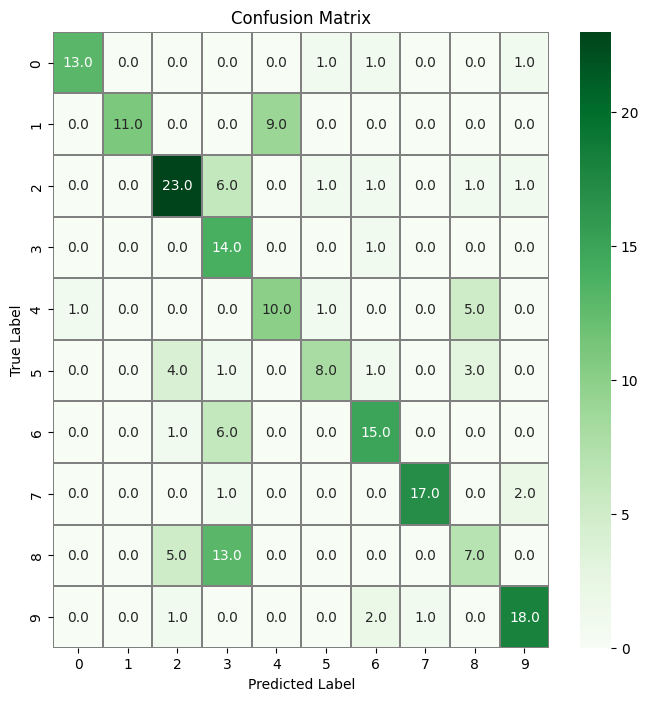

In [17]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()